<a href="https://colab.research.google.com/github/MADDIPATIGOWTHAM/CodeWay/blob/main/Movie_Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC


In [5]:
train_path = "/content/drive/MyDrive/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['title', 'genre', 'description'], engine='python')

In [6]:
print(train_data.describe())

                                 title    genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [7]:
print(train_data.isnull().sum())

title          0
genre          0
description    0
dtype: int64


In [8]:
train_data.tail()

,title,genre,description
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [10]:
test_path = "/content/drive/MyDrive/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=["title", "description"], engine='python')


In [11]:
test_data.isnull().sum()

title          0
description    0
dtype: int64

In [12]:
test_data.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


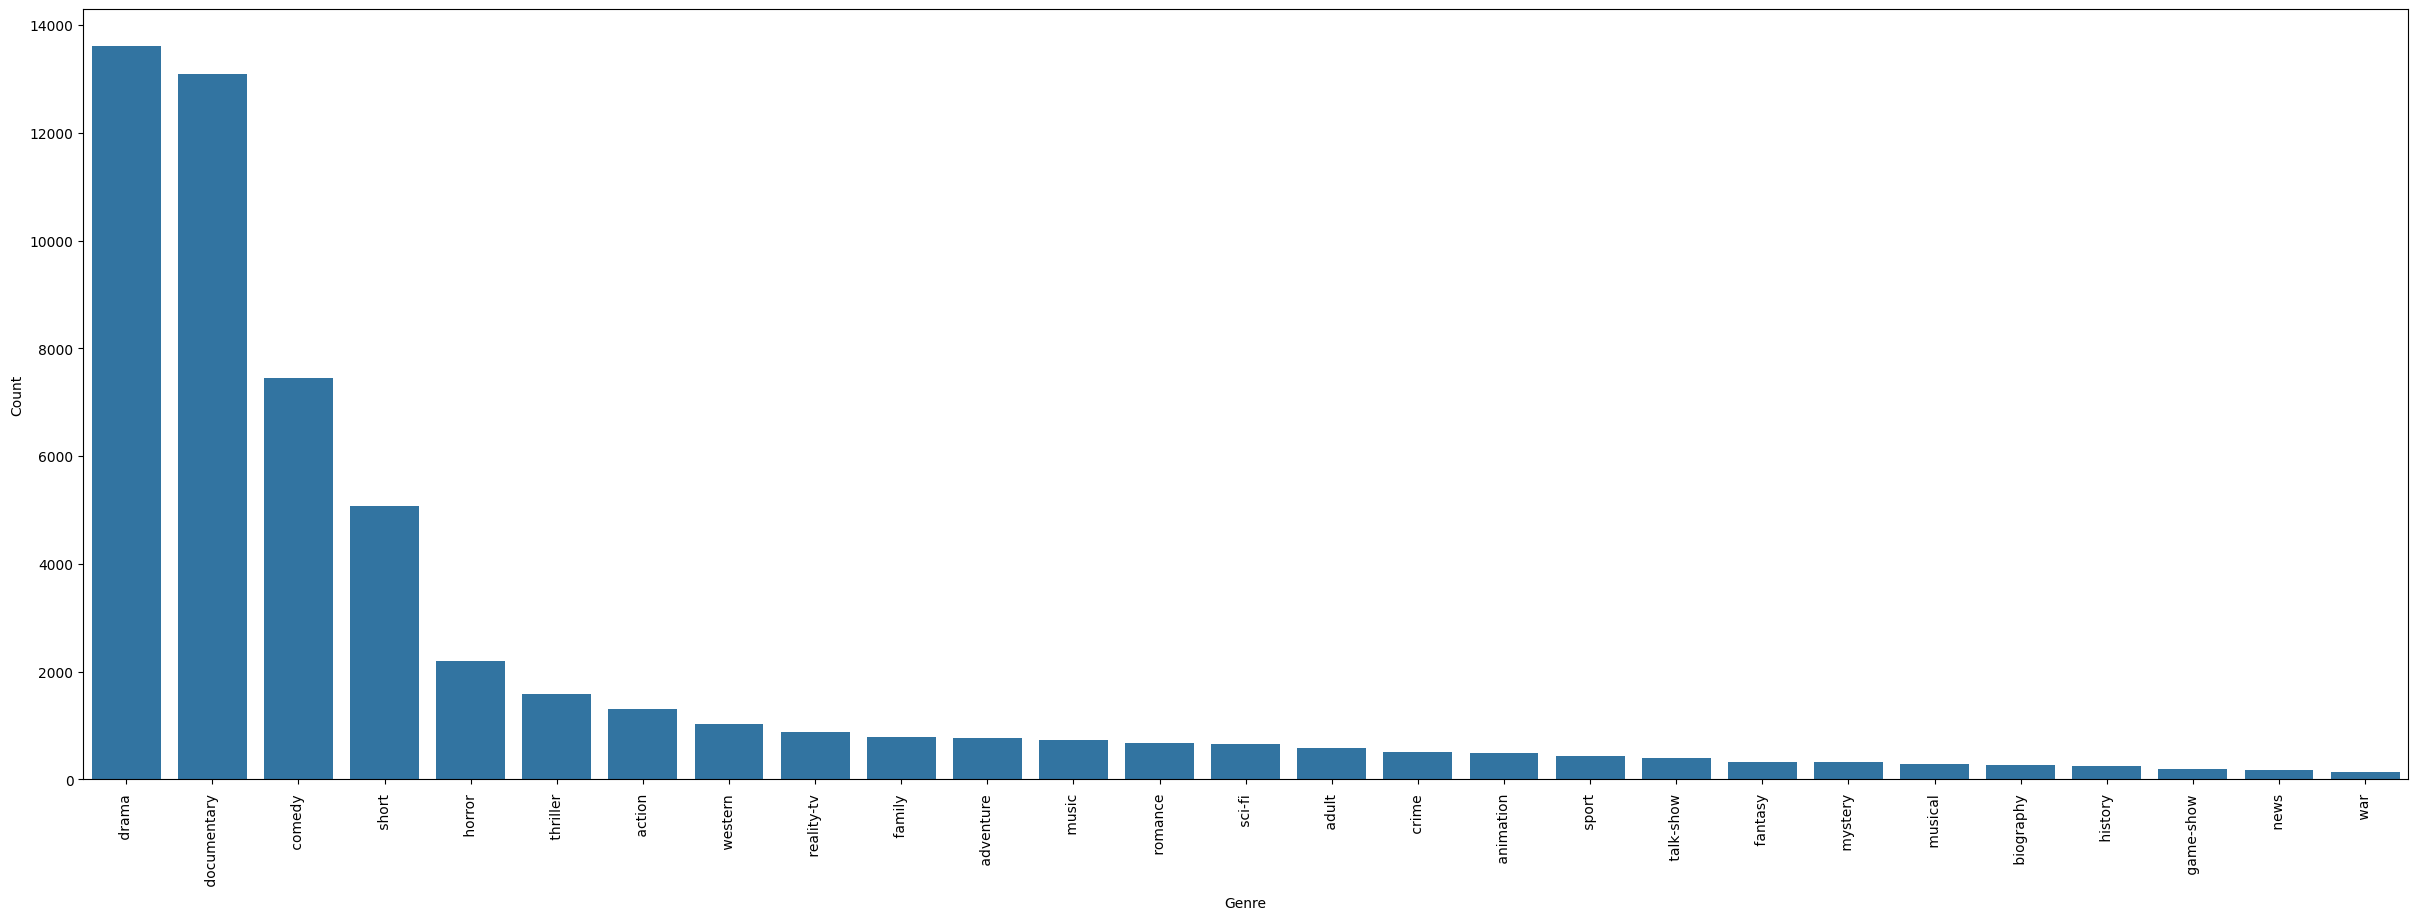

In [13]:
plt.figure(figsize=(30,10))
counts = train_data.genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [14]:
train_data.genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64

In [16]:
train_data = train_data.drop_duplicates()
train_data.shape

(54214, 3)

In [18]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '', text)
    text = re.sub(r"[^a-zA-Z+' ]", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r'#', "", text)
    text = re.sub(r"_", " ", text)
    text = re.sub('\n', " . ", text)
    text = re.sub('\n', '', text)
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub("\s[\s]+", " ", text).strip()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2])
    return text


In [22]:
import nltk
nltk.download('punkt')
test_data['description_cleaned'] = test_data['description'].apply(clean_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
test_data['description_cleaned']

1        brane loves life car apartment job especially ...
2        spain march quico naughty child three belongin...
3        one year life albin family shepherds north tra...
4        father died hasnt spoken brother years serious...
5        known internationally martial arts superstar b...
                               ...                        
54196    covering multiple genres tales light dark anth...
54197    alice cora munro attempt find father british o...
54198    movie years making oliver twist artful dodger ...
54199    popular mysterious rock mike mallard askew bro...
54200    curitiba city movement rhythms different pulsa...
Name: description_cleaned, Length: 54200, dtype: object

In [24]:
train_data['description_cleaned'] = train_data['description'].apply(clean_data)
train_data['description_cleaned']

1        listening conversation doctor parents year old...
2        brother sister past incestuous relationship cu...
3        bus empties students field trip museum natural...
4        help unemployed father make ends meet edith tw...
5        films title refers recovered bodies ground zer...
                               ...                        
54210    short lived nbc live sitcom centered bonino wo...
54211    next generation exploitation sisters kapa bay ...
54212    bestaan echt stand comedy growing facing fears...
54213    walter vivian live country difficult time keep...
54214    labor day weekend intense hurricane ever make ...
Name: description_cleaned, Length: 54214, dtype: object

In [26]:
from nltk.stem import PorterStemmer

# Initialize PorterStemmer
st = PorterStemmer()

# Apply stemming to train_data['description_cleaned']
train_data['description_cleaned'] = train_data['description_cleaned'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

# Apply stemming to test_data['description_cleaned']
test_data['description_cleaned'] = test_data['description_cleaned'].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))


In [27]:
from sklearn.feature_extraction.text import CountVectorizer as CV

def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


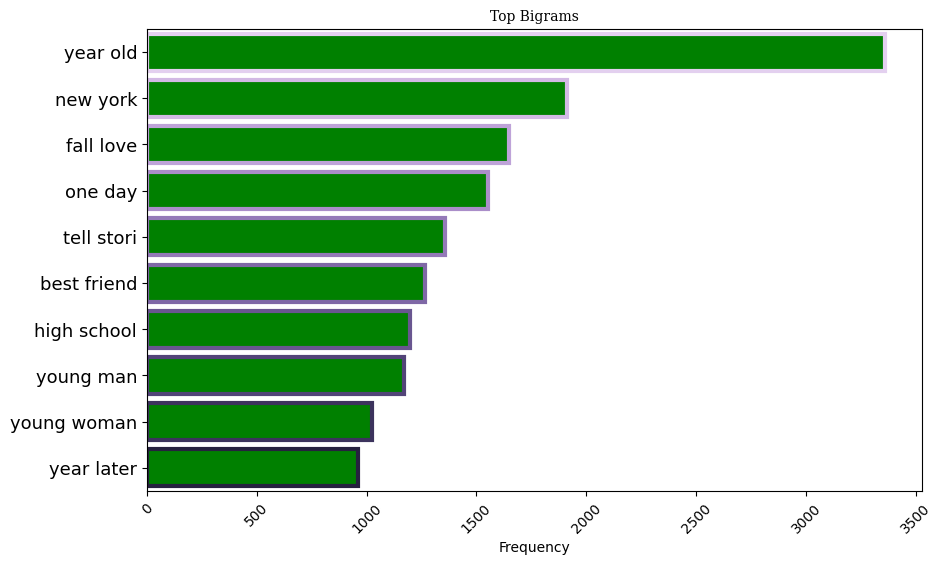

In [28]:
common_words = get_top_n_bigram(train_data['description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words, columns=['word', 'freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df, facecolor='green', linewidth=3, edgecolor=sns.color_palette("ch:start=3, rot=.1", 10))
plt.title("Top Bigrams", font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.ylabel("")
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'].values)
train_df = train_data.loc[:, ['description_cleaned', 'genre']]
test_df = test_data.loc[:, ['description_cleaned', 'title']]
train_df.head(10)


,description_cleaned,genre
1,listen convers doctor parent year old oscar le...,8
2,brother sister past incestu relationship curre...,24
3,bu empti student field trip museum natur histo...,1
4,help unemploy father make end meet edith twin ...,8
5,film titl refer recov bodi ground zero also st...,8
6,qualiti control consist seri singl take shot f...,7
7,tough econom time max joey run idea discov sen...,5
8,ron petri keanu reev troubl teen whose life ha...,6
9,sudden calamit event caus great loss life dama...,18
10,four high school student embark terrifi journe...,13


In [31]:
from sklearn.model_selection import train_test_split
train_set , val_set , train_label , val_label = train_test_split(train_df['description_cleaned'] , train_data['genre'] , test_size=0.2 , shuffle=True , random_state = 42)
print(f'Spliting data into train and evaluate sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Spliting data into train and evaluate sets
Trani Set	: 43371
Validation Set	: 10843


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [35]:
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.52      0.28      0.37       263
           1       0.82      0.29      0.42       112
           2       0.40      0.12      0.19       139
           3       0.38      0.03      0.05       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.20      0.02      0.03       107
           7       0.66      0.84      0.74      2659
           8       0.53      0.79      0.64      2697
           9       0.42      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       0.91      0.50      0.65        40
          12       0.00      0.00      0.00        45
          13       0.66      0.57      0.61       431
          14       0.67      0.46      0.55       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

In [39]:
print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.46      0.33      0.39       263
           1       0.68      0.44      0.53       112
           2       0.39      0.21      0.27       139
           3       0.38      0.13      0.20       104
           4       0.00      0.00      0.00        61
           5       0.53      0.58      0.55      1443
           6       0.22      0.06      0.09       107
           7       0.68      0.80      0.73      2659
           8       0.55      0.71      0.62      2697
           9       0.37      0.15      0.22       150
          10       0.40      0.05      0.10        74
          11       0.83      0.62      0.71        40
          12       0.25      0.02      0.04        45
          13       0.60      0.63      0.61       431
          14       0.55      0.53      0.54       144
          15       0.27      0.06      0.10        50
          16       0.00      0.00      0.00        56
          17       0.29    

In [40]:
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

SVC model accuracy is: 57.13%
Logistic Regression accuracy is: 57.84%
